In [ ]:
base1.summary()

In [1]:
import cv2
import os
from PIL import Image
import numpy as np
#import Augmentor
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input  
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

2024-05-01 09:47:11.727890: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 09:47:11.728042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 09:47:11.872955: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
base_path = os.path.join('/kaggle/input/thermo/thermo1')
dir_path = os.listdir(base_path)
#dir_path.reverse()
print(dir_path)
files = []
labels = []

['Benign', 'malignant']


In [3]:
def img_preprocessing(img_path):
    img = load_img(img_path, target_size=(224, 224)) 
    img = img_to_array(img)  # Convert to NumPy array
    #img = np.expand_dims(img, axis=0)# Add a batch dimension (needed for the model)
    img = preprocess_input(img)  
    return img

In [4]:
for i, img_class in enumerate(dir_path):
    for image in os.listdir(os.path.join(base_path,img_class)):
        img_path = os.path.join(base_path,img_class,image)
        img_array = img_preprocessing(img_path)
        files.append(img_array)
        labels.append(i)

In [5]:
indices = np.arange(len(files))
np.random.shuffle(indices)
m_files = []
m_labels = []
for indice in indices:
    m_files.append(files[indice])
    m_labels.append(labels[indice])

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
x_train, x_test, y_train, y_test = train_test_split(m_files, m_labels, test_size = 0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [19]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [20]:
count_0_val = np.sum(y_val == 0)
count_1_val = np.sum(y_val == 1)
count_2_val = np.sum(y_val == 2)

count_0_train = np.sum(y_train == 0)
count_1_train = np.sum(y_train == 1)
count_2_train = np.sum(y_train == 2)

count_0_test = np.sum(y_test == 0)
count_1_test = np.sum(y_test == 1)
count_2_test = np.sum(y_test == 2)

print(count_0_val, count_1_val, count_2_val)
print(count_0_train, count_1_train, count_2_train)
print(count_0_test, count_1_test, count_2_test)

117 127 0
492 481 0
153 152 0


In [21]:
y_train_encoded = to_categorical(y_train, num_classes=2)
#print(f'1: {y_train_encoded}')
y_train_encoded = y_train_encoded.reshape(-1, 2) 
#print(f'2: {y_train_encoded}')

y_val_encoded = to_categorical(y_val, num_classes=2)
y_val_encoded = y_val_encoded.reshape(-1, 2)


#x_test = to_categorical(y_train, num_classes=3)
#y_test = to_categorical(y_train, num_classes=3)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,Activation
from tensorflow.keras.initializers import GlorotUniform, HeNormal
import matplotlib.pyplot as plt
from keras import regularizers
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.metrics import Precision, Recall
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.regularizers import l2
from keras.models import load_model
from tensorflow.keras.models import save_model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model

In [40]:
#base1 = DenseNet121(weights=None, include_top=False, input_shape=(224,224,3))
#base1.load_weights("/kaggle/input/chexnet-keras-weights/brucechou1983_CheXNet_Keras_0.3.0_weights.h5", by_name=True, skip_mismatch=True)
#base1.load_weights("/kaggle/input/radimagenet-densenet121/RadImageNet-DenseNet121_notop.h5")

#base1 = InceptionV3(weights=None, include_top=False, input_shape=(224,224,3))
#base1.load_weights("/kaggle/input/radimagenet-inceptionv3/RadImageNet-InceptionV3_notop.h5")
#base1.trainable = False

#base1 = InceptionResNetV2(weights=None, include_top=False, input_shape=(224,224,3))
#base1.load_weights("/kaggle/input/radimagenet-irv2/RadImageNet-IRV2_notop.h5")
#base1.trainable = False

base1 = ResNet50(weights=None, include_top=False, input_shape=(224,224,3))
base1.load_weights("/kaggle/input/radimagenet-resnet50-notop/RadImageNet-ResNet50_notop.h5")
base1.trainable = False

In [ ]:
base1.summary()

In [26]:
base1.trainable = True

set_trainable = False

for layer in base1.layers:
    if layer.name in ['conv5_block16_1_conv','conv5_block16_2_conv','conv5_block15_1_conv','conv5_block15_2_conv']:
        layer.trainable = True
    else:
        layer.trainable = False          

<KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_878>
<KerasTensor shape=(None, 50176), dtype=float32, sparse=False, name=keras_tensor_879>
<KerasTensor shape=(None, 51200), dtype=float32, sparse=False, name=keras_tensor_880>
<KerasTensor shape=(None, 51200), dtype=float32, sparse=False, name=keras_tensor_881>

In [22]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(2, activation='softmax')(z)

model1 = Model(inputs, outputs)

model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=10, batch_size=32) 

Epoch 1/10
 2/31 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5625 - loss: 2.9343  

I0000 00:00:1714557229.789614     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


31/31 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.4935 - loss: 4.0960 - val_accuracy: 0.4795 - val_loss: 1.5962
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5398 - loss: 1.1403 - val_accuracy: 0.5000 - val_loss: 0.6682
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5266 - loss: 0.8696 - val_accuracy: 0.5861 - val_loss: 0.5714
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6224 - loss: 0.7140 - val_accuracy: 0.5164 - val_loss: 0.7215
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6932 - loss: 0.5733 - val_accuracy: 0.7418 - val_loss: 0.4952
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6798 - loss: 0.6046 - val_accuracy: 0.8443 - val_loss: 0.4082
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8336 - loss: 0.3960 - val_accuracy: 0.7172 - val_loss: 0.5085
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6446 - loss: 0.6174 - val_accuracy: 0.7992 - val_loss: 0.4

In [23]:
model1.save('chex_121.h5')

In [29]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(2, activation='softmax')(z)

model2 = Model(inputs, outputs)

model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=10, batch_size=50) 

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.4718 - loss: 23.7548 - val_accuracy: 0.4795 - val_loss: 7.8823
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.5559 - loss: 8.4176 - val_accuracy: 0.7664 - val_loss: 1.4321
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6491 - loss: 3.1664 - val_accuracy: 0.6025 - val_loss: 4.1963
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6618 - loss: 2.7223 - val_accuracy: 0.6434 - val_loss: 3.3299
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7258 - loss: 2.1392 - val_accuracy: 0.8443 - val_loss: 0.7281
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8210 - loss: 0.6223 - val_accuracy: 0.8648 - val_loss: 0.4597
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8448 - loss: 0.5327 - val_accuracy: 0.8402 - val_loss: 0.5892
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8128 - loss: 0.7016 - val_accuracy: 0.6844 - 

In [30]:
model2.save('Rad_121.h5')

In [35]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(2, activation='softmax')(z)

model3 = Model(inputs, outputs)

model3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=10, batch_size=40) 

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5274 - loss: 1.7817 - val_accuracy: 0.7541 - val_loss: 0.4744
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.7454 - loss: 0.5052 - val_accuracy: 0.8115 - val_loss: 0.3910
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8412 - loss: 0.3528 - val_accuracy: 0.8852 - val_loss: 0.3124
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8911 - loss: 0.3076 - val_accuracy: 0.8443 - val_loss: 0.3220
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8970 - loss: 0.2778 - val_accuracy: 0.9016 - val_loss: 0.2734
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8816 - loss: 0.2890 - val_accuracy: 0.9057 - val_loss: 0.2580
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8999 - loss: 0.2622 - val_accuracy: 0.9180 - val_loss: 0.2301
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9182 - loss: 0.2068 - val_accuracy: 0.9139 - va

In [36]:
model3.save('Rad_V3.h5')

In [38]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(2, activation='softmax')(z)

model4 = Model(inputs, outputs)

model4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=10, batch_size=40) 

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6106 - loss: 1.5604 - val_accuracy: 0.9180 - val_loss: 0.2188
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.9309 - loss: 0.1703 - val_accuracy: 0.9713 - val_loss: 0.1016
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.9813 - loss: 0.0774 - val_accuracy: 0.9795 - val_loss: 0.0706
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.9869 - loss: 0.0578 - val_accuracy: 0.9877 - val_loss: 0.0603
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.9974 - loss: 0.0424 - val_accuracy: 0.9959 - val_loss: 0.0468
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.9919 - loss: 0.0421 - val_accuracy: 0.9959 - val_loss: 0.0576
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.9970 - loss: 0.0313 - val_accuracy: 0.9713 - val_loss: 0.0707
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.9995 - loss: 0.0307 - val_accuracy: 0.99

In [39]:
model4.save('Rad_IRV2.h5')

In [44]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(2, activation='softmax')(z)

model5 = Model(inputs, outputs)

model5.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=8, batch_size=64) 

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 738ms/step - accuracy: 0.5209 - loss: 11.6139 - val_accuracy: 0.6434 - val_loss: 2.7148
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.6435 - loss: 3.2001 - val_accuracy: 0.7049 - val_loss: 2.9008
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.7705 - loss: 2.2099 - val_accuracy: 0.8361 - val_loss: 1.0904
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.8420 - loss: 0.9763 - val_accuracy: 0.8156 - val_loss: 0.7293
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.8772 - loss: 0.4035 - val_accuracy: 0.8443 - val_loss: 0.4950
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.8786 - loss: 0.3510 - val_accuracy: 0.8852 - val_loss: 0.3410
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.8887 - loss: 0.2794 - val_accuracy: 0.7541 - val_loss: 0.7373
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8552 - loss: 0.3662 - val_accuracy: 0.8852 -

In [45]:
model5.save('Rad_50.h5')

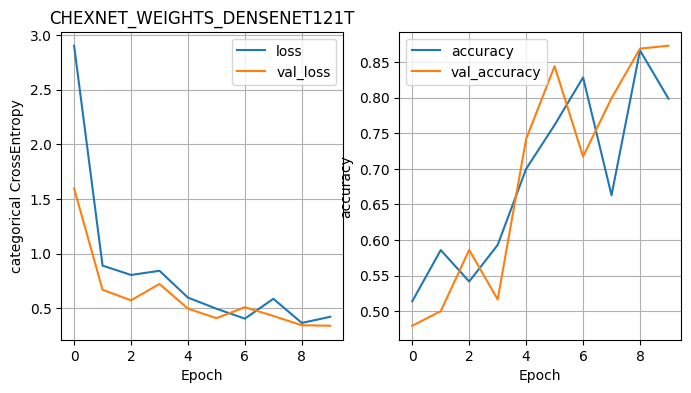

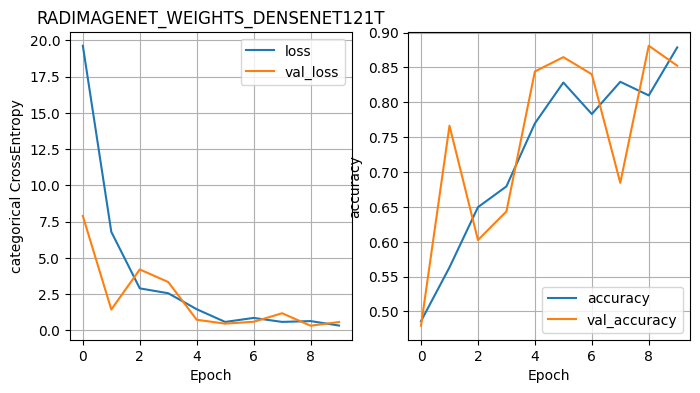

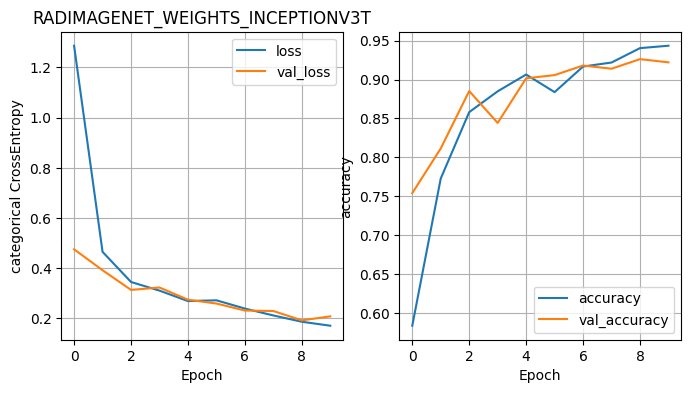

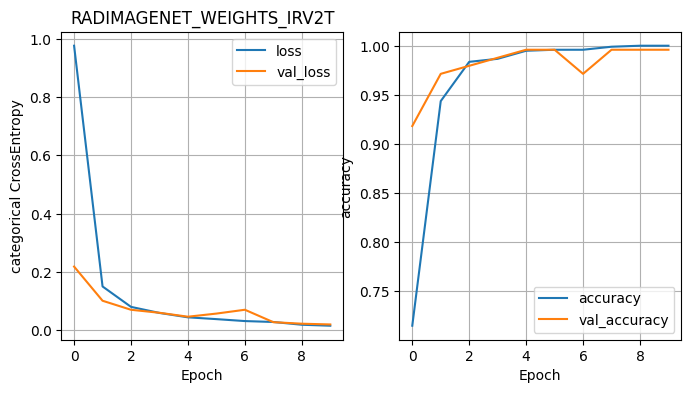

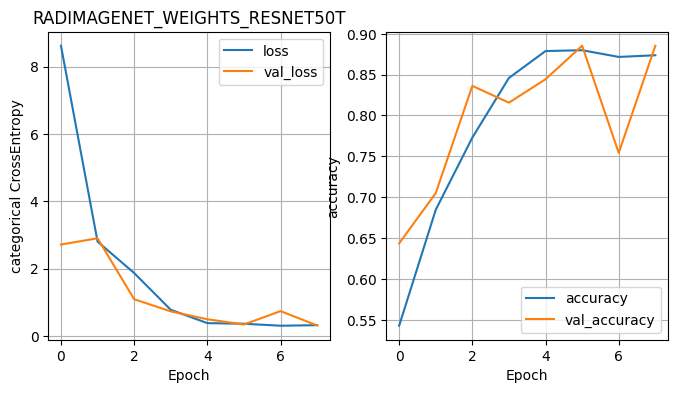

In [46]:
def plot_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('categorical CrossEntropy')
    ax1.legend() 
    ax1.grid(True)
    ax1.set_title(title)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

plot_history(history1,'CHEXNET_WEIGHTS_DENSENET121T')
plot_history(history2,'RADIMAGENET_WEIGHTS_DENSENET121T')
plot_history(history3,'RADIMAGENET_WEIGHTS_INCEPTIONV3T')
plot_history(history4,'RADIMAGENET_WEIGHTS_IRV2T')
plot_history(history5,'RADIMAGENET_WEIGHTS_RESNET50T')

In [47]:
from sklearn.metrics import classification_report

# Assuming y_test is the true labels and x_test is the test data

models = [model1, model2, model3, model4, model5]  # Assuming model1, model2, and model3 are your three models
model_names = ['CHEXNET_WEIGHTS_DENSENET_121U', 'RADIMAGENET_WEIGHTS_DENSENET_121U','RADIMAGENET_WEIGHTS_INCEPTIONV3U','RADIMAGENET_WEIGHTS_IRV2U','RADIMAGENET_WEIGHTS_RESNET50U' ]

for model, name in zip(models, model_names):
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5).astype(int)
    y_pred = np.argmax(y_pred, axis=1)

    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print()

10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step
Classification Report for CHEXNET_WEIGHTS_DENSENET_121U:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       153
           1       0.82      0.96      0.88       152

    accuracy                           0.87       305
   macro avg       0.88      0.87      0.87       305
weighted avg       0.88      0.87      0.87       305


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step
Classification Report for RADIMAGENET_WEIGHTS_DENSENET_121U:
              precision    recall  f1-score   support

           0       0.99      0.65      0.78       153
           1       0.74      0.99      0.85       152

    accuracy                           0.82       305
   macro avg       0.86      0.82      0.81       305
weighted avg       0.86      0.82      0.81       305


10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
Classification Report for RADIMAGENET_WEIGHTS_INCEPTIONV3U:
              precision    recall  f1-score   sup